# ML Project on NASA tubro engine

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Pre-Processing

In [157]:
path1 = "CMaps/train_FD001.txt"
# path2 = "CMaps/train_FD002.txt"
# path3 = "CMaps/train_FD003.txt"
# path4 = "CMaps/train_FD004.txt"

In [158]:
raw_data = pd.read_csv(path1, sep=' ', header = None)
raw_data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [159]:
raw_data.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26    20631
27    20631
dtype: int64

### Data Preprocessing Steps

Using the provided dataset and above observations, the following preprocessing steps were applied:

1. **Remove Columns 26 and 27**: These columns were dropped as they consist entirely of NaN (missing) values.
2. **Add "EOL" (End of Life) Column**: A new column "EOL" was added to indicate the end of life for each instance.
3. **Add "LR" (Life Ratio) Column**: The "LR" (Life Ratio) column was calculated and added to represent the ratio of current age to the total life expectancy.
4. **Add "RUL" (Remaining Useful Life) Column**: A new column "RUL" (Remaining Useful Life) was introduced to indicate the remaining operational lifespan of the instance.
5. **Add Labels for Classification**: A new column for labels was added, classifying the instances into three categories based on their condition:
   - **0**: Good Condition
   - **1**: Moderate Condition
   - **2**: Warning Condition


In [160]:
def preprocessing(file_path):
    raw_data = pd.read_csv(file_path, sep=' ', header = None)
    raw_data = raw_data.drop([26,27], axis='columns')
    raw_data.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
    
    EOL=[]
    for sl_no in raw_data['ID']:
            EOL.append( ((raw_data[raw_data['ID'] == sl_no]["Cycle"]).values)[-1])
            
    # Append the "EOL" column
    raw_data["EOL"] = EOL
    
    # Calculate "LR"
    raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])
    
    # Calculate "RUL"
    raw_data["RUL"] = raw_data["EOL"]-raw_data["Cycle"]
    
    
    labels=[]
    for i in range (0,len(raw_data)):
        if np.array(raw_data["LR"])[i] <= 0.6:
            labels.append(0)
        elif np.array(raw_data["LR"])[i] <= 0.8 :
            labels.append(1)   
        else :
            labels.append(2)  
            
    raw_data["labels"]=labels
    
    # Drop ID, EOL, LR if you want
    # raw_data=raw_data.drop(columns=['ID','EOL', 'LR]) 
    
    return raw_data

In [161]:
df1 = preprocessing(path1)
# df2 = preprocessing(path2)
# df3 = preprocessing(path3)
# df4 = preprocessing(path4)

In [162]:
# df = pd.concat([df1, df2, df3, df4],ignore_index=True)
df = df1
df

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL,LR,RUL,labels
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.03,392,2388,100.0,39.06,23.4190,192,0.005208,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.03,392,2388,100.0,39.00,23.4236,192,0.010417,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.03,390,2388,100.0,38.95,23.3442,192,0.015625,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.03,392,2388,100.0,38.88,23.3739,192,0.020833,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.03,393,2388,100.0,38.90,23.4044,192,0.026042,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,0.03,397,2388,100.0,38.49,22.9735,200,0.980000,4,2
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,0.03,395,2388,100.0,38.30,23.1594,200,0.985000,3,2
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,0.03,398,2388,100.0,38.44,22.9333,200,0.990000,2,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,0.03,395,2388,100.0,38.29,23.0640,200,0.995000,1,2


# EDA: Exploratory Data Analysis

In [163]:
df.drop(columns=['ID', 'EOL', 'LR', 'labels'], inplace=True)
df

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [164]:
df.describe()

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
count,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,...,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


In [165]:
# count distinct observations over the requested axis
df.nunique(axis = 0)

Cycle               362
OpSet1              158
OpSet2               13
OpSet3                1
SensorMeasure1        1
SensorMeasure2      310
SensorMeasure3     3012
SensorMeasure4     4051
SensorMeasure5        1
SensorMeasure6        2
SensorMeasure7      513
SensorMeasure8       53
SensorMeasure9     6403
SensorMeasure10       1
SensorMeasure11     159
SensorMeasure12     427
SensorMeasure13      56
SensorMeasure14    6078
SensorMeasure15    1918
SensorMeasure16       1
SensorMeasure17      13
SensorMeasure18       1
SensorMeasure19       1
SensorMeasure20     120
SensorMeasure21    4745
RUL                 362
dtype: int64

In [166]:
def makeBoxPlot(df):
    plt.figure(figsize = (10, 15))
    for i in np.arange(1, 25):      
        temp = df.iloc[:, i]
        plt.subplot(5,6, i)
        plt.boxplot(temp)  
        plt.title(df.columns[i])
    plt.show()

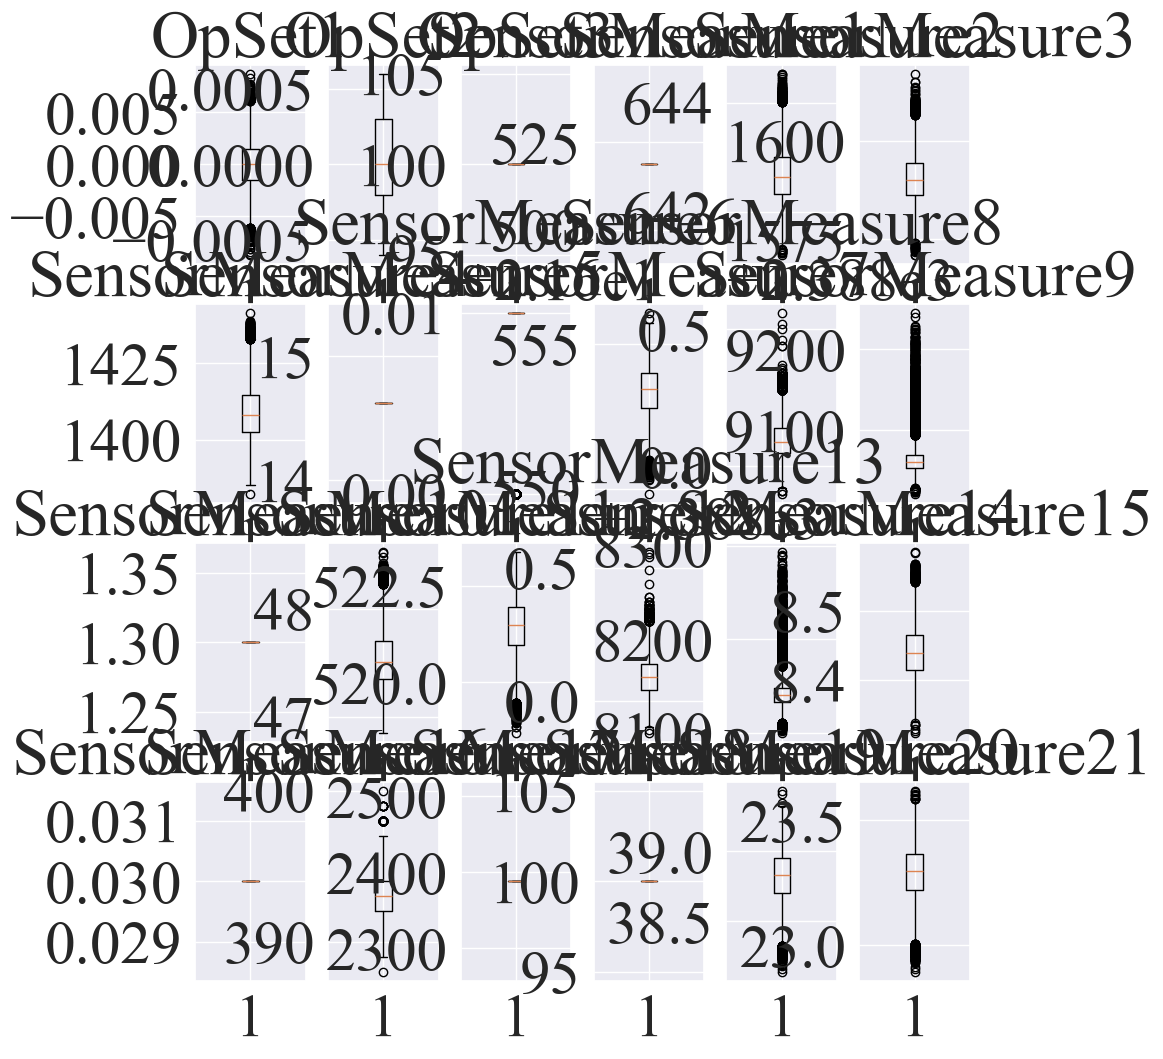

In [167]:
makeBoxPlot(df)

[Text(0, 0.5, 'Cycle'),
 Text(0, 1.5, 'OpSet1'),
 Text(0, 2.5, 'OpSet2'),
 Text(0, 3.5, 'OpSet3'),
 Text(0, 4.5, 'SensorMeasure1'),
 Text(0, 5.5, 'SensorMeasure2'),
 Text(0, 6.5, 'SensorMeasure3'),
 Text(0, 7.5, 'SensorMeasure4'),
 Text(0, 8.5, 'SensorMeasure5'),
 Text(0, 9.5, 'SensorMeasure6'),
 Text(0, 10.5, 'SensorMeasure7'),
 Text(0, 11.5, 'SensorMeasure8'),
 Text(0, 12.5, 'SensorMeasure9'),
 Text(0, 13.5, 'SensorMeasure10'),
 Text(0, 14.5, 'SensorMeasure11'),
 Text(0, 15.5, 'SensorMeasure12'),
 Text(0, 16.5, 'SensorMeasure13'),
 Text(0, 17.5, 'SensorMeasure14'),
 Text(0, 18.5, 'SensorMeasure15'),
 Text(0, 19.5, 'SensorMeasure16'),
 Text(0, 20.5, 'SensorMeasure17'),
 Text(0, 21.5, 'SensorMeasure18'),
 Text(0, 22.5, 'SensorMeasure19'),
 Text(0, 23.5, 'SensorMeasure20'),
 Text(0, 24.5, 'SensorMeasure21'),
 Text(0, 25.5, 'RUL')]

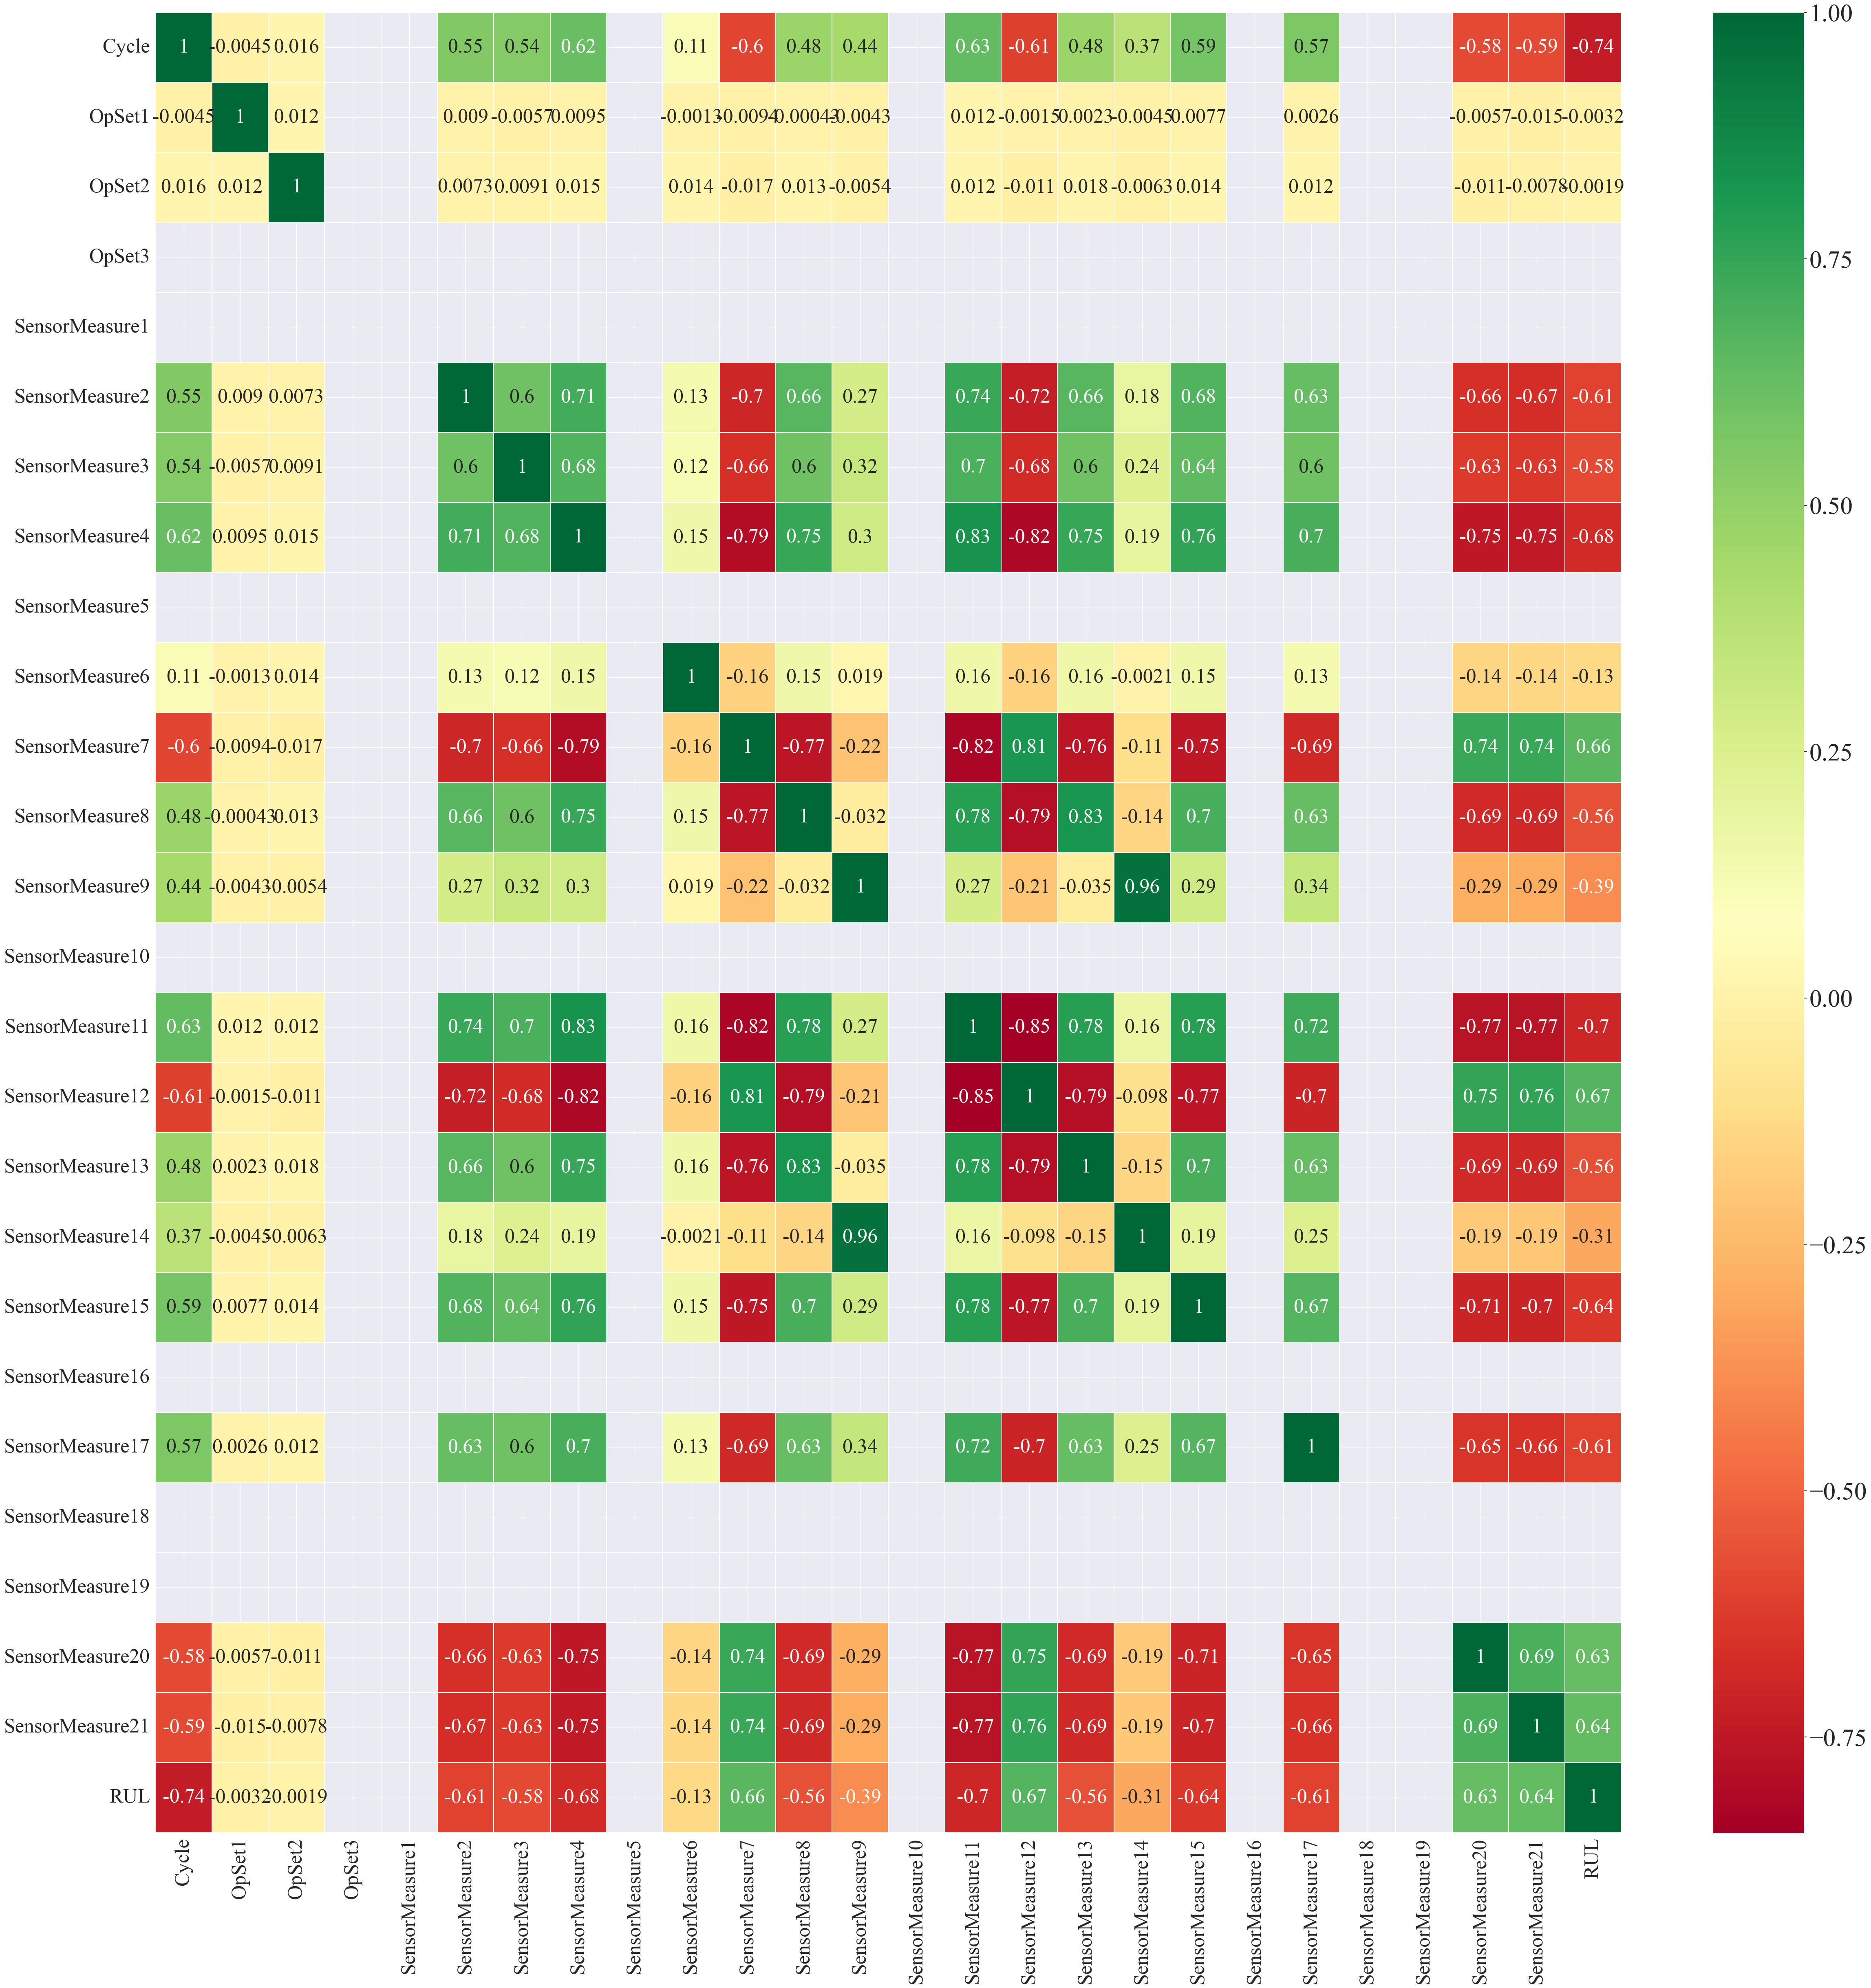

In [168]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(58,58))
sns.set(font_scale=4,font="Times New Roman")

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),cmap="RdYlGn", linewidths=0.1, annot=True, annot_kws={"size":36})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 36)
g.set_yticklabels(g.get_xmajorticklabels(), fontsize = 36)

# Drop columns which have less than 0.5 correlation with RUL

In [169]:
def getDeletedColumns(df):
    delete_columns=[]
    for col in df.columns:
        corr = df[col].corr(df['RUL'])
        #print(col,corr)
        if abs(corr)>0.5:
            pass
        else:    
            delete_columns.append(col)
            
    return delete_columns

delete_columns = getDeletedColumns(df1)
delete_columns

C:\Users\Subham Maurya\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Subham Maurya\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


['OpSet1',
 'OpSet2',
 'OpSet3',
 'SensorMeasure1',
 'SensorMeasure5',
 'SensorMeasure6',
 'SensorMeasure9',
 'SensorMeasure10',
 'SensorMeasure14',
 'SensorMeasure16',
 'SensorMeasure18',
 'SensorMeasure19']

In [170]:
new_df = df1.drop(columns=delete_columns)
new_df

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,197,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,198,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,199,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


[Text(0, 0.5, 'Cycle'),
 Text(0, 1.5, 'SensorMeasure2'),
 Text(0, 2.5, 'SensorMeasure3'),
 Text(0, 3.5, 'SensorMeasure4'),
 Text(0, 4.5, 'SensorMeasure7'),
 Text(0, 5.5, 'SensorMeasure8'),
 Text(0, 6.5, 'SensorMeasure11'),
 Text(0, 7.5, 'SensorMeasure12'),
 Text(0, 8.5, 'SensorMeasure13'),
 Text(0, 9.5, 'SensorMeasure15'),
 Text(0, 10.5, 'SensorMeasure17'),
 Text(0, 11.5, 'SensorMeasure20'),
 Text(0, 12.5, 'SensorMeasure21'),
 Text(0, 13.5, 'RUL')]

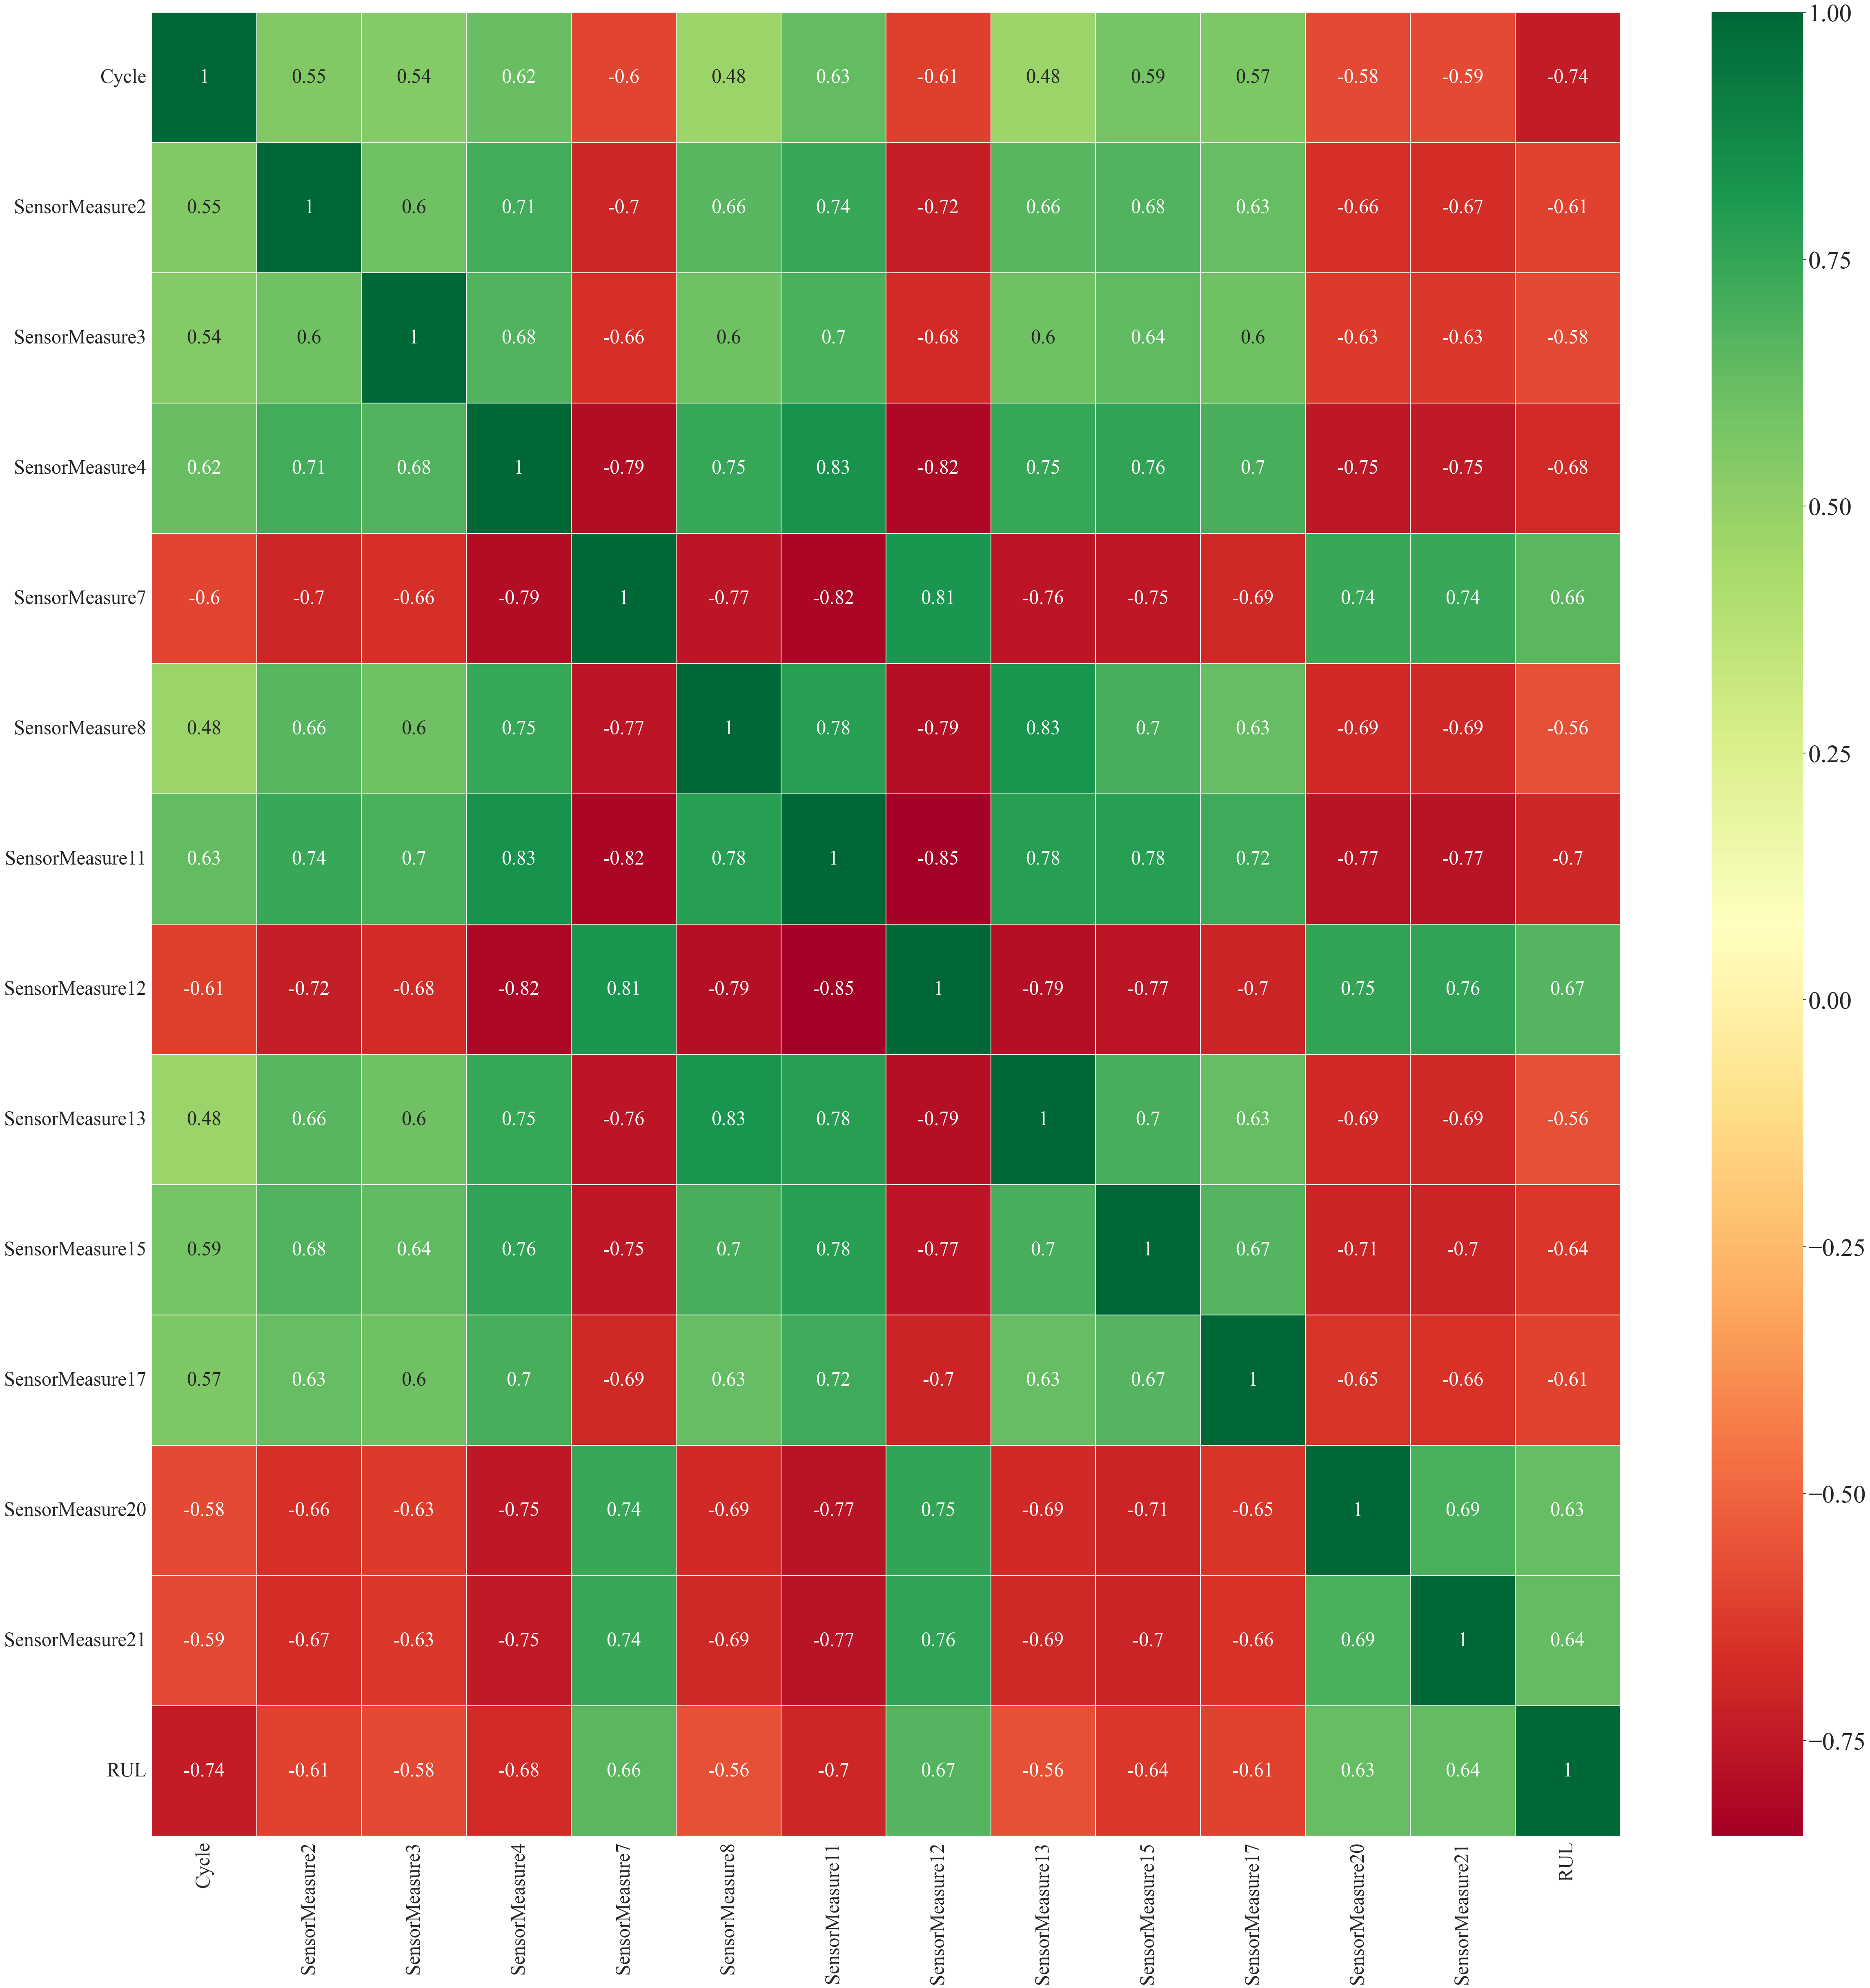

In [171]:
corrmat = new_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(58,58))
sns.set(font_scale=4,font="Times New Roman")

#plot heat map
g=sns.heatmap(new_df[top_corr_features].corr(),cmap="RdYlGn", linewidths=0.1, annot=True, annot_kws={"size":35})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 35)
g.set_yticklabels(g.get_xmajorticklabels(), fontsize = 35)

# Model Training

In [172]:
df  = preprocessing(path1)
df.drop(columns=['ID', 'EOL', 'LR', 'RUL'], inplace=True)
df

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,2
20627,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,2
20628,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,2


In [173]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Decision Tree Model

Accuracy: 85.03%


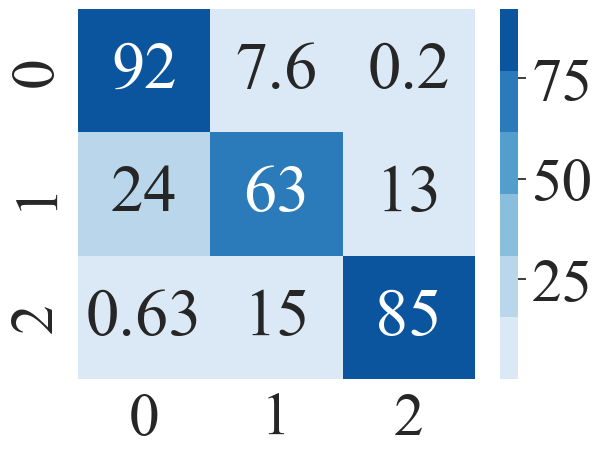

In [175]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test data
y_pred_DT = decision_tree.predict(X_test)

# Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_DT, normalize='true') * 100)

# Plot confusion matrix as heatmap
colormap = sns.color_palette("Blues")
sns.heatmap(cm, annot=True, cmap=colormap)

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred_DT)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Random Forest Model

Accuracy: 89.58%


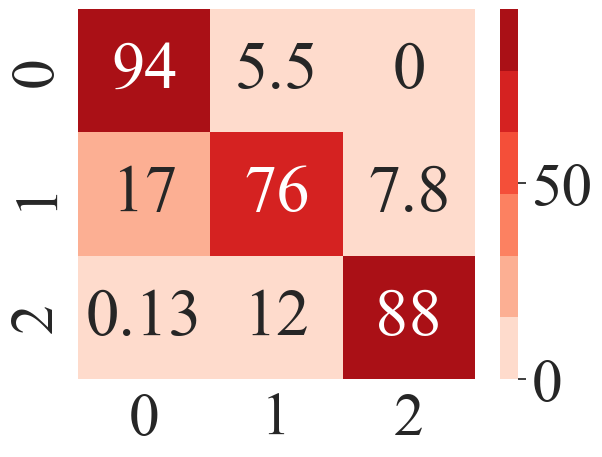

In [176]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest model
RF = RandomForestClassifier(random_state=42)

# Train the model
RF.fit(X_train, y_train)

# Predict on the test data
y_pred_RF = RF.predict(X_test)

# Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)

# Plot confusion matrix as heatmap
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred_RF)
print(f'Accuracy: {accuracy * 100:.2f}%')

## Best Parameters for random forest
# RF.get_params()